In [1]:
# import necessary packages

import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
# read issue lifetime data

hadoop = pd.read_csv('datasets/hadoop.csv')
kafka = pd.read_csv('datasets/kafka.csv')
node = pd.read_csv('datasets/node.csv')

In [3]:
hadoop.head()

,issueCleanedBodyLen,meanCommentSizeT,nActorsT,nCommentsT,nCommitsByActorsT,nCommitsByCreator,nCommitsByUniqueActorsT,nCommitsInProject,nCommitsProjectT,nIssuesByCreator,nIssuesByCreatorClosed,nIssuesCreatedInProject,nIssuesCreatedInProjectClosed,nIssuesCreatedProjectClosedT,nIssuesCreatedProjectT,nLabelsT,nSubscribedByT,timeOpen
0,11,0,1,0,190,0,40,580,280,14,0,804,10,1,378,0,0,7
1,9,0,1,0,1905,0,72,776,1970,6,0,871,25,79,2517,0,0,1
2,2,0,1,0,1920,0,74,841,2006,1,0,907,26,79,2549,0,0,180
3,5,10,1,1,1133,0,62,684,1225,1,0,792,7,29,1602,0,0,1
4,12,0,1,0,331,20,47,593,410,1,0,788,9,4,550,0,0,7


In [4]:
hadoop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12191 entries, 0 to 12190
Data columns (total 18 columns):
issueCleanedBodyLen              12191 non-null int64
meanCommentSizeT                 12191 non-null int64
nActorsT                         12191 non-null int64
nCommentsT                       12191 non-null int64
nCommitsByActorsT                12191 non-null int64
nCommitsByCreator                12191 non-null int64
nCommitsByUniqueActorsT          12191 non-null int64
nCommitsInProject                12191 non-null int64
nCommitsProjectT                 12191 non-null int64
nIssuesByCreator                 12191 non-null int64
nIssuesByCreatorClosed           12191 non-null int64
nIssuesCreatedInProject          12191 non-null int64
nIssuesCreatedInProjectClosed    12191 non-null int64
nIssuesCreatedProjectClosedT     12191 non-null int64
nIssuesCreatedProjectT           12191 non-null int64
nLabelsT                         12191 non-null int64
nSubscribedByT             

In [5]:
hadoop.describe()

,issueCleanedBodyLen,meanCommentSizeT,nActorsT,nCommentsT,nCommitsByActorsT,nCommitsByCreator,nCommitsByUniqueActorsT,nCommitsInProject,nCommitsProjectT,nIssuesByCreator,nIssuesByCreatorClosed,nIssuesCreatedInProject,nIssuesCreatedInProjectClosed,nIssuesCreatedProjectClosedT,nIssuesCreatedProjectT,nLabelsT,nSubscribedByT,timeOpen
count,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000,12191.000000
mean,68.326224,42.965138,9.154868,14.833402,18352.841933,1.506849,136.888688,694.919285,18464.826265,18.481749,4.524075,686.399311,29.128866,6152.724223,16711.299155,0.055533,4.279222,562.773193
std,77.182388,25.395429,6.981903,14.075953,7811.973480,12.723259,17.810763,533.287662,7751.413610,18.730562,13.004494,249.127949,39.957747,3514.226700,7213.513556,0.287189,5.482791,407.652884
min,1.000000,0.000000,1.000000,0.000000,190.000000,0.000000,40.000000,0.000000,280.000000,1.000000,0.000000,1.000000,0.000000,1.000000,378.000000,0.000000,0.000000,1.000000
25%,29.000000,29.000000,5.000000,7.000000,12164.000000,0.000000,132.000000,0.000000,12339.000000,5.000000,0.000000,546.000000,3.000000,3096.000000,10435.000000,0.000000,1.000000,180.000000
50%,48.000000,40.000000,8.000000,12.000000,20190.000000,0.000000,142.000000,816.000000,20300.000000,13.000000,1.000000,706.000000,15.000000,6181.000000,16971.000000,0.000000,3.000000,365.000000
75%,81.000000,53.000000,11.000000,18.000000,26145.000000,0.000000,151.000000,1140.000000,26145.000000,25.000000,4.000000,865.000000,43.500000,9223.000000,23510.000000,0.000000,6.000000,1000.000000
max,1551.000000,541.000000,153.000000,303.000000,26145.000000,192.000000,151.000000,1588.000000,26145.000000,135.000000,229.000000,1204.000000,288.000000,12192.000000,27434.000000,6.000000,120.000000,1000.000000


In [6]:
X, y = hadoop.iloc[:,:-1], hadoop.iloc[:,-1]

In [7]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [9]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [10]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[05:16:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [11]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 416.713544


In [12]:
# k-fold cross-validation

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

[05:16:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:16:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,645.551676,2.520891,645.878927,5.670061
1,603.552165,2.467199,604.357890,5.781010
2,566.039347,2.385897,567.325501,5.703055
3,533.705322,2.422872,535.240865,4.905227
4,505.573242,2.227072,507.449351,4.659882


In [14]:
print((cv_results["test-rmse-mean"]).tail(1))

49    349.328837
Name: test-rmse-mean, dtype: float64


In [15]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[05:16:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


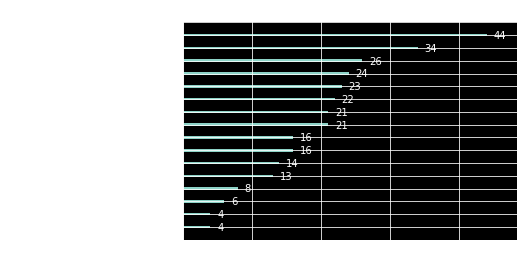

In [17]:
# plotting the tree

import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5, 5]

plt.show()